In [1]:
import os
import mediapipe as mp 
import numpy as np
import cv2
import pickle

## **1. Gesture Collection**

In [2]:
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [17]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('../data/Gesture_Data') 
LANDMARK_PATH = os.path.join('../data/Gesture_Landmarks')

# Actions that we try to detect

actions = np.array(['eat', 'friend'])
# actions = np.array(['Hello', 'Love You', 'Understand', 'Thanks', 'Some', 'Home', 'name', 'my', 'how'])
# actions = np.array(['Sorry', "Help me", "Yes", "No", "eat", "friend"])
# actions = np.array([ "No", "eat"])

# Thirty videos worth of data
no_sequences =  25

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [18]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            os.makedirs(os.path.join(LANDMARK_PATH, action, str(sequence)))
        except:
            pass

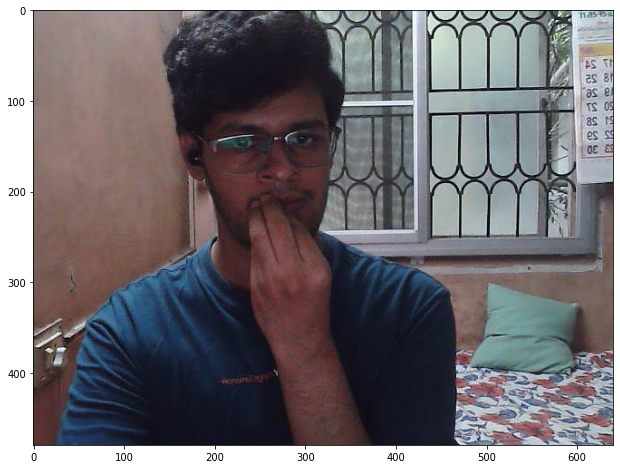

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
pkl = open('../data/Gesture_Data/eat/0/8', 'rb')
im = pickle.load(pkl)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [19]:
def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

cap = cv2.VideoCapture(0)

print(actions)
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences): 
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()
            
            # Get Camera dimensions
            x, y, c = frame.shape
            frame, result = mediapipe_detection(frame, holistic)
            className = ''
            
            # Process the result
            if result.left_hand_landmarks or result.right_hand_landmarks:
                landmarks = []

                # Save Landmark Lists for future processing
                pkl_path = os.path.join(LANDMARK_PATH, action, str(sequence), str(frame_num))
                img_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                with open(img_path, 'wb') as im:
                    pickle.dump(frame, im)


                with open(pkl_path, 'wb') as f:

                    if result.left_hand_landmarks and result.right_hand_landmarks:
                        pickle.dump({"Left":result.left_hand_landmarks, "Right":result.right_hand_landmarks, 
                                    "Face": result.face_landmarks, "Pose": result.pose_landmarks}, f)

                    elif result.left_hand_landmarks:
                        pickle.dump({"Left":result.left_hand_landmarks, "Right":0, 
                                    "Face": result.face_landmarks, "Pose": result.pose_landmarks}, f)

                    elif result.right_hand_landmarks:
                        pickle.dump({"Left":0, "Right":result.right_hand_landmarks, 
                                    "Face": result.face_landmarks, "Pose": result.pose_landmarks}, f)

                # lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                # rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                
                # for i in range(len(lh)):
                #     landmarks.append([lh[i][0], lh[i][1], rh[i][0], rh[i][1]])
                
                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
                mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                # npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                # np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

['eat' 'friend']


In [5]:
cap.release()
cv2.destroyAllWindows()

### Landmark Collection Processing Test

In [ ]:
for (dirpath, dirnames, filenames) in os.walk(os.path.join(LANDMARK_PATH, action)):
    if filenames != []:
        print(dirpath, " || ", dirnames, " || ", filenames)

In [23]:
# for (dirpath, dirnames, filenames) in os.walk(os.path.join('./data/MP_Data_Landmarks\ Hello/0')):
#     print(dirpath, " || ", dirnames, " || ", filenames)

with open("../data/Gesture_Landmarks/Hello/0/0", 'rb') as f:
    temp = pickle.load(f)

print(temp.keys())
print(temp)

dict_keys(['Left', 'Right', 'Face', 'Pose'])
{'Left': landmark {
  x: 0.7639003396034241
  y: 0.4915165901184082
  z: -1.4612560050863976e-07
}
landmark {
  x: 0.7122788429260254
  y: 0.5233388543128967
  z: 0.0002445264835841954
}
landmark {
  x: 0.6669280529022217
  y: 0.5235884189605713
  z: 0.002434847177937627
}
landmark {
  x: 0.6293884515762329
  y: 0.5087409615516663
  z: -0.00031232571927830577
}
landmark {
  x: 0.5933420658111572
  y: 0.49066397547721863
  z: -0.002898399019613862
}
landmark {
  x: 0.6434884071350098
  y: 0.4177962839603424
  z: 0.03234456107020378
}
landmark {
  x: 0.5971636176109314
  y: 0.3968755006790161
  z: 0.028217073529958725
}
landmark {
  x: 0.5641341805458069
  y: 0.3886408805847168
  z: 0.017753422260284424
}
landmark {
  x: 0.534692645072937
  y: 0.3785668611526489
  z: 0.00824954267591238
}
landmark {
  x: 0.6497134566307068
  y: 0.38496658205986023
  z: 0.021541524678468704
}
landmark {
  x: 0.5974389314651489
  y: 0.3570370078086853
  z: 0.016

## **2. Alphabet Collection**

In [12]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [28]:
DATA_PATH = os.path.join('./data/Character_Data') 
LANDMARK_PATH = os.path.join('./data/Character_Data_Landmarks')

actions = np.array( [ chr(i) for i in range(ord('U'), ord('Y')+1) ] )
# actions = np.array(['E'])
print(actions)

no_sequences =  25
sequence_length = 30
start_folder = 0

['U' 'V' 'W' 'X' 'Y']


In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            # os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            os.makedirs(os.path.join(LANDMARK_PATH, action, str(sequence)))
        except:
            pass

In [10]:
import math
 
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

In [30]:
def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape
            frame, result = mediapipe_detection(frame, hands)  
            className = ''
            
            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []

                pkl_path = os.path.join(LANDMARK_PATH, action, str(sequence), str(frame_num))
                with open(pkl_path, 'wb') as f:
                    pickle.dump(result.multi_hand_landmarks, f)

                for handslms in result.multi_hand_landmarks:
                    
                #     angle_1 = getAngle((handslms.landmark[mpHands.HandLandmark.THUMB_TIP].x, handslms.landmark[mpHands.HandLandmark.THUMB_TIP].y),
                #                             (handslms.landmark[mpHands.HandLandmark.WRIST].x, handslms.landmark[mpHands.HandLandmark.WRIST].y),
                #                             (handslms.landmark[mpHands.HandLandmark.PINKY_TIP].x, handslms.landmark[mpHands.HandLandmark.PINKY_TIP].y))

                #     angle_2 = getAngle((handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].x, handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].y),
                #                         (handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_MCP].x, handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_MCP].y),
                #                         (handslms.landmark[mpHands.HandLandmark.MIDDLE_FINGER_TIP].x, handslms.landmark[mpHands.HandLandmark.MIDDLE_FINGER_TIP].y))

                #     # angle_3 = getAngle((handslms.landmark[mpHands.HandLandmark.THUMB_TIP].x, handslms.landmark[mpHands.HandLandmark.THUMB_TIP].y),
                #     #                     (handslms.landmark[mpHands.HandLandmark.WRIST].x, handslms.landmark[mpHands.HandLandmark.WRIST].y),
                #     #                     (handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].x, handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].y))
                    
                #     for lm in handslms.landmark:
                #         lmx = int(lm.x * x)
                #         lmy = int(lm.y * y)
                        

                #         landmarks.append([lmx, lmy])
                #     landmarks.append([angle_1, angle_2])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                # npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                # np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [19]:
cap.release()
cv2.destroyAllWindows()

### Landmark Processing

In [ ]:
for (dirpath, dirnames, filenames) in os.walk(os.path.join(LANDMARK_PATH, action)):
    if filenames != []:
        print(dirpath, " || ", dirnames, " || ", filenames)

In [24]:
with open(LANDMARK_PATH + "/A/0/0", 'rb') as f:
    temp = pickle.load(f)

print(temp)

[landmark {
  x: 0.703121542930603
  y: 0.7075721621513367
  z: -1.4293437743617687e-05
}
landmark {
  x: 0.6407036185264587
  y: 0.6598061323165894
  z: -0.00026755392900668085
}
landmark {
  x: 0.6133453249931335
  y: 0.5866129398345947
  z: -0.0033629087265580893
}
landmark {
  x: 0.6085043549537659
  y: 0.517384946346283
  z: -0.01776842586696148
}
landmark {
  x: 0.6079214811325073
  y: 0.45565229654312134
  z: -0.030422991141676903
}
landmark {
  x: 0.6418766379356384
  y: 0.5336267948150635
  z: 0.05150540918111801
}
landmark {
  x: 0.6357977986335754
  y: 0.4693397581577301
  z: 0.01953570358455181
}
landmark {
  x: 0.6321566700935364
  y: 0.5193647742271423
  z: 0.004923675674945116
}
landmark {
  x: 0.6371386647224426
  y: 0.5522836446762085
  z: 0.010959232226014137
}
landmark {
  x: 0.6727499961853027
  y: 0.531866729259491
  z: 0.03800182789564133
}
landmark {
  x: 0.6635476350784302
  y: 0.4697135388851166
  z: -0.010434870608150959
}
landmark {
  x: 0.6554995775222778
  

In [2]:
from tensorflow.keras.models import load_model
import tensorflowjs as tfjs

model = load_model('../model_saves/checkpoints/alphabets_Z_model')
print("Model: ", model)
tfjs.converters.save_keras_model(model, "../model_saves/tensorflowjs_model")

Model:  <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001E6DC3584E0>


## **3. Pre-processing Code**

In [ ]:
list_of_files = {}
# MP_Data for gestures, MP_Data_Char for Alphabets
for (dirpath, dirnames, filenames) in os.walk("./data/MP_Data_Char_Test"):
    # print(dirpath, "\n", dirnames, "\n", len(filenames))
    if(len(filenames)!=30):
         print(dirpath, "\n", len(filenames))

In [8]:
with open("../signs/alphabets.pkl",'rb') as f:
    actions = pickle.load(f)

print(actions)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'U', 'V', 'W', 'X', 'Y']


In [6]:
actions = [chr(i) for i in range(ord('A'), ord('Y')+1) if chr(i)!="T" and chr(i)!="Z"]
print(actions)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'U', 'V', 'W', 'X', 'Y']


In [10]:
with open("../signs/gestures.pkl",'rb') as f:
    actions = pickle.load(f)
print(actions)

['Hello' 'Love You' 'Understand' 'Thanks' 'Some' 'Home' 'name' 'my' 'how']


In [24]:
actions = np.array(['Hello', 'Love You', 'Understand', 'Thanks', 'Some', 'Home', 'name', 'my', 'how', 'Sorry', "Help me", "Yes", "No", "eat", "friend"])
# actions = np.array(['Sorry', "Help me", "Yes", "No", "eat", "friend"])

In [25]:
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

{'Hello': 0, 'Love You': 1, 'Understand': 2, 'Thanks': 3, 'Some': 4, 'Home': 5, 'name': 6, 'my': 7, 'how': 8, 'Sorry': 9, 'Help me': 10, 'Yes': 11, 'No': 12, 'eat': 13, 'friend': 14}


In [29]:
data = []
labels = []

for action in actions:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join("../data/Gesture_Landmarks", action)):
        if(len(dirnames)==0):
            # print(dirpath, filenames)
            for filename in filenames:
                data.append(np.load( os.path.join(dirpath, filename), allow_pickle=True ))
                labels.append(label_map[action])

data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

KeyboardInterrupt: 

In [34]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 749, 1: 750, 2: 742, 3: 750, 4: 748, 5: 695, 6: 750, 7: 750, 8: 750, 9: 737, 10: 750, 11: 125, 12: 406, 13: 116, 14: 749}


In [35]:
# from tensorflow.keras.utils.np_utils import to_categorical
import tensorflow as tf

lab = tf.keras.utils.to_categorical(labels)
print(lab.shape)

(9567, 15)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, lab, test_size=0.2, random_state=42)

unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print("Training: ", dict(zip(unique, counts)))

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print("Test: ", dict(zip(unique, counts)))

Training:  {0: 591, 1: 600, 2: 593, 3: 600, 4: 602, 5: 548, 6: 590, 7: 602, 8: 618, 9: 589, 10: 593, 11: 104, 12: 327, 13: 94, 14: 602}
Test:  {0: 158, 1: 150, 2: 149, 3: 150, 4: 146, 5: 147, 6: 160, 7: 148, 8: 132, 9: 148, 10: 157, 11: 21, 12: 79, 13: 22, 14: 147}


In [37]:
print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (7653, 21, 4) (7653, 15)
Test:  (1914, 21, 4) (1914, 15)


## **4. Model Training**

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [39]:
model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(rate=0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 84)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                5440      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [40]:
callback_checkpoint = ModelCheckpoint(
    './checkpoints/', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch',
)
callback_loss = EarlyStopping(monitor='loss', patience=4)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    callbacks=[callback_checkpoint, callback_loss])

Epoch 1/50
240/240 [==============================] - 2s 5ms/step - loss: 1.5844 - accuracy: 0.3947
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 0.9934 - accuracy: 0.6137
Epoch 3/50
240/240 [==============================] - 1s 4ms/step - loss: 0.7049 - accuracy: 0.7324
Epoch 4/50
240/240 [==============================] - 1s 4ms/step - loss: 0.5005 - accuracy: 0.8185
Epoch 5/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.8450
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3675 - accuracy: 0.8722
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 0.3012 - accuracy: 0.8993
Epoch 8/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2763 - accuracy: 0.9050
Epoch 9/50
240/240 [==============================] - 1s 4ms/step - loss: 0.2369 - accuracy: 0.9271
Epoch 10/50
240/240 [==============================] - 1s 4ms/step - loss: 0.1889 - accuracy: 0.9445

In [46]:
# model.save("./checkpoints/alphabets_angles_model_2")
model.save("./checkpoints/gesture_15_model_v2")

INFO:tensorflow:Assets written to: ./checkpoints/gesture_15_model_v2\assets


## **5. Model Evaluation and Metrics**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
from tensorflow.keras.models import load_model
model = load_model("checkpoints/two_hand_9_model")
# model = load_model("checkpoints/alphabets_Z_model")

In [43]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred, axis=1)

unique, counts = np.unique(y_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 158, 1: 150, 2: 149, 3: 149, 4: 146, 5: 148, 6: 159, 7: 148, 8: 128, 9: 156, 10: 155, 11: 21, 12: 79, 13: 21, 14: 147}


In [44]:
def evaluate_model(history, X_test, y_test, model, title):
  """
    Input: 
      history - Model history variable
      X_test - Test features
      y_test - Target test variables
      model - Keras Model 

    Output:
      Accuracy Plot (Training + Validation)
      Loss Plot (Training + Validation)
      Confusion matrix
      Accuracy
      Classification Report
  """  
  scores = model.evaluate((X_test),y_test, verbose=0)
  
  fig, axs = plt.subplots(1,3, figsize=(28,9))
  fig.tight_layout()

  axs[0].plot(history.history['accuracy'])
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Model - Accuracy (' + title +")")
  axs[0].legend(['Training'], loc='lower right')

  axs[1].plot(history.history['loss'])
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Model Loss')
  axs[1].set_title('Model - Loss (' + title +")")
  axs[1].legend(['Training'], loc='upper right')

  target_names=actions
  
  y_true=[]
  for element in y_test:
      y_true.append(np.argmax(element))
  prediction_proba = model.predict(X_test)
  prediction = np.argmax(prediction_proba,axis=1)
  cnf_matrix = confusion_matrix(y_true, prediction)    
  g = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[2],
                  xticklabels=target_names, yticklabels=target_names)
  plt.show()

  print("\nAccuracy: %.2f%% \n" % (scores[1]*100))
  print(classification_report(y_true, prediction, target_names=target_names))

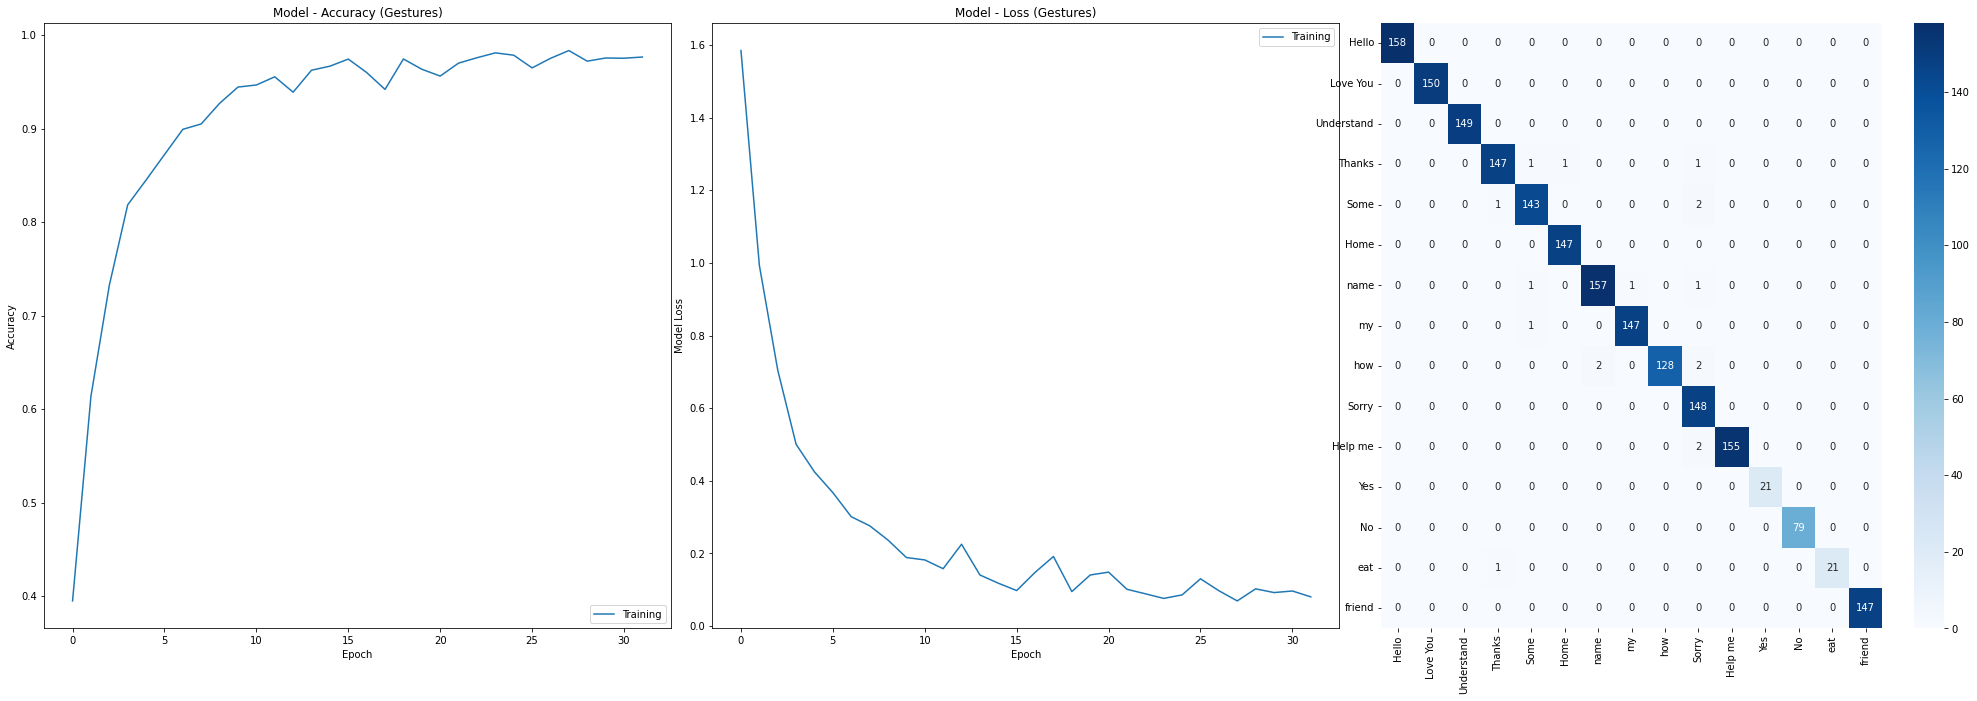


Accuracy: 99.11% 

              precision    recall  f1-score   support

       Hello       1.00      1.00      1.00       158
    Love You       1.00      1.00      1.00       150
  Understand       1.00      1.00      1.00       149
      Thanks       0.99      0.98      0.98       150
        Some       0.98      0.98      0.98       146
        Home       0.99      1.00      1.00       147
        name       0.99      0.98      0.98       160
          my       0.99      0.99      0.99       148
         how       1.00      0.97      0.98       132
       Sorry       0.95      1.00      0.97       148
     Help me       1.00      0.99      0.99       157
         Yes       1.00      1.00      1.00        21
          No       1.00      1.00      1.00        79
         eat       1.00      0.95      0.98        22
      friend       1.00      1.00      1.00       147

    accuracy                           0.99      1914
   macro avg       0.99      0.99      0.99      1914
weight

In [45]:
evaluate_model(history, X_test, y_test, model, title="Gestures")

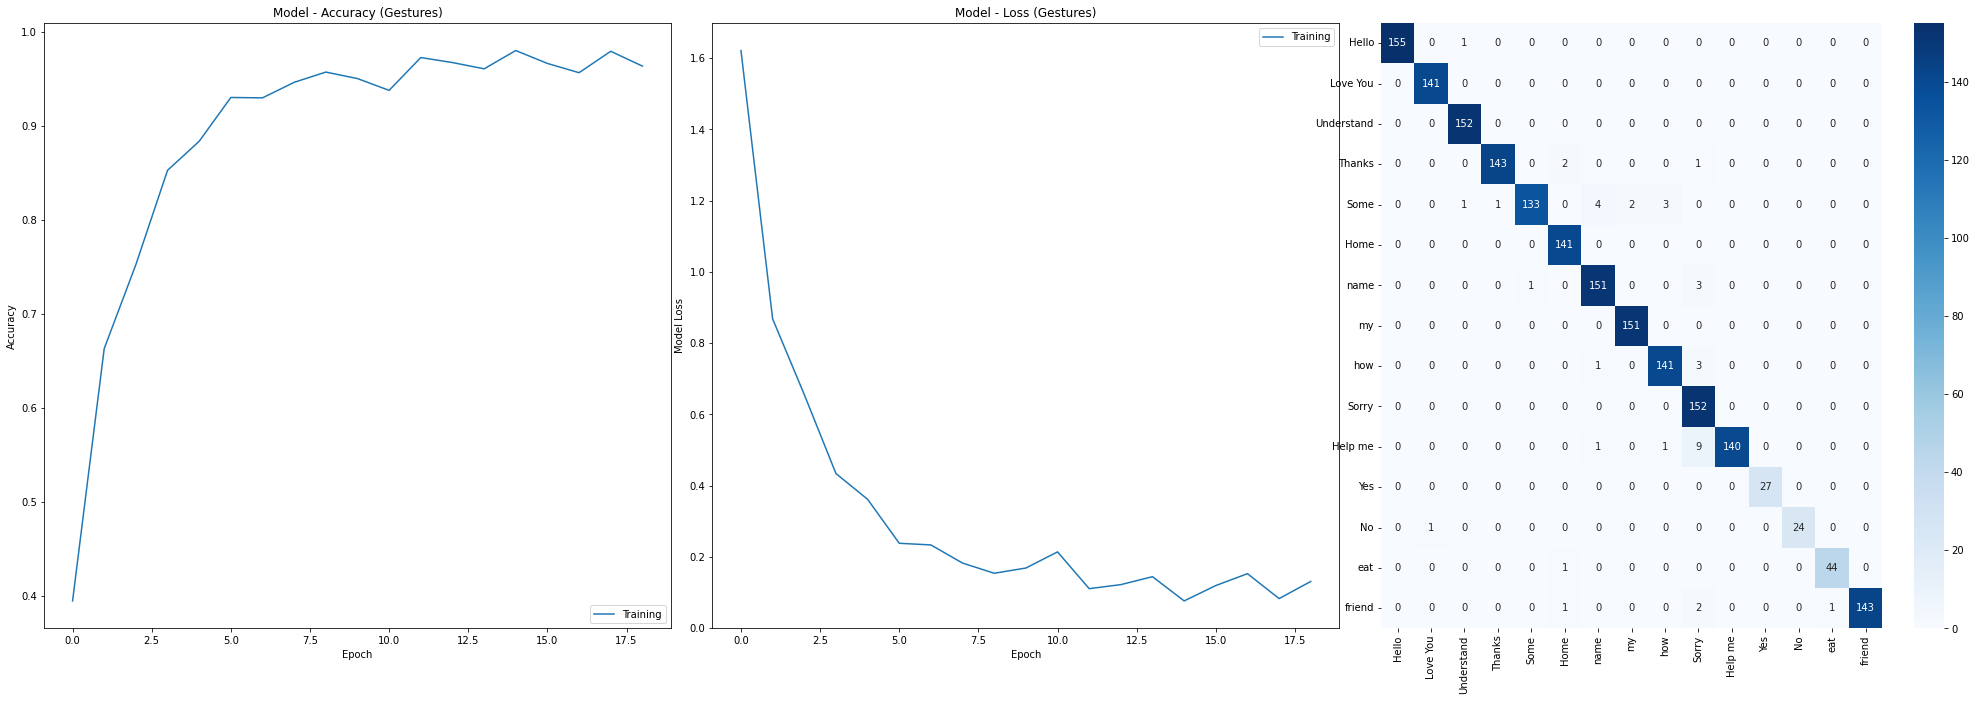


Accuracy: 97.87% 

              precision    recall  f1-score   support

       Hello       1.00      0.99      1.00       156
    Love You       0.99      1.00      1.00       141
  Understand       0.99      1.00      0.99       152
      Thanks       0.99      0.98      0.99       146
        Some       0.99      0.92      0.96       144
        Home       0.97      1.00      0.99       141
        name       0.96      0.97      0.97       155
          my       0.99      1.00      0.99       151
         how       0.97      0.97      0.97       145
       Sorry       0.89      1.00      0.94       152
     Help me       1.00      0.93      0.96       151
         Yes       1.00      1.00      1.00        27
          No       1.00      0.96      0.98        25
         eat       0.98      0.98      0.98        45
      friend       1.00      0.97      0.99       147

    accuracy                           0.98      1878
   macro avg       0.98      0.98      0.98      1878
weight

In [21]:
evaluate_model(history, X_test, y_test, model, title="Gestures")

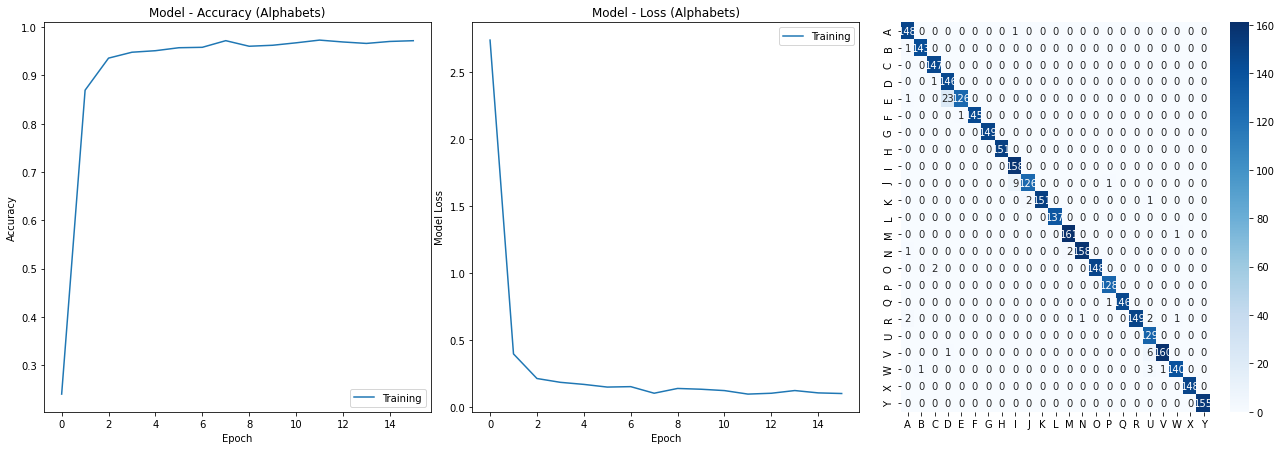


Accuracy: 98.07% 

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       149
           B       0.99      0.99      0.99       144
           C       0.98      1.00      0.99       147
           D       0.86      0.99      0.92       147
           E       0.99      0.84      0.91       150
           F       1.00      0.99      1.00       146
           G       1.00      1.00      1.00       149
           H       1.00      1.00      1.00       151
           I       0.94      1.00      0.97       158
           J       0.98      0.93      0.95       136
           K       1.00      0.98      0.99       154
           L       1.00      1.00      1.00       137
           M       0.99      0.99      0.99       162
           N       0.99      0.98      0.99       161
           O       1.00      0.99      0.99       150
           P       0.98      1.00      0.99       128
           Q       1.00      0.99      1.00       147
       

In [242]:
evaluate_model(history, X_test, y_test, model, title="Alphabets")

## **6. Live testing**

### **a. Gestures**

In [31]:
# Import necessary packages
import cv2
import numpy as np
import pickle
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# Initialize mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('../model_saves/gesture_15_model')

# Load class names
# with open('../signs/gestures.pkl','rb') as f:
#     actions = pickle.load(f)
# actions = np.array(['Hello', 'Love You', 'Understand', 'Thanks', 'Some', 'Home', 'name', 'my', 'how', 'Sorry', "Help me", "Yes", "No", "eat", "friend"])
actions = np.array(['eat', 'friend', 'Hello', 'Help me', 'Home', 'how', 'Love You', 'my', 'name', 'No', 'Some', 'Sorry', 'Thanks', 'Understand', 'Yes'])
print(actions)

sentence = []
predictions = []

def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*28), (int(prob*100), 90+num*28), colors[1], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*28), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:

    # Read each frame from the webcam
    _, frame = cap.read()
    x, y, c = frame.shape
    frame, result = mediapipe_detection(frame, holistic)
    className = ''

    # Process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        for i in range(len(lh)):
            landmarks.append([lh[i][0], lh[i][1], rh[i][0], rh[i][1]])
        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


        # Predict gesture
        prediction = model.predict([landmarks])
        classID = np.argmax(prediction)
        predictions.append(classID)
        className = actions[classID]

        if np.unique(predictions[-20:])[0] == classID: 
                if prediction[0][classID] > 0.7: 
                    
                    if len(sentence) > 0: 
                        if actions[classID] != sentence[-1]:
                            sentence.append(actions[classID])
                    else:
                        sentence.append(actions[classID])

        if len(sentence) > 4: 
            sentence = sentence[-4:]
        

        frame = prob_viz(prediction[0], actions, frame, colors)

    if cv2.waitKey(1) == ord('r'):
            if(len(sentence)!=0):
                sentence.pop()
            # print("Popped: ", sentence)
            
    # show the prediction on the frame
    cv2.rectangle(frame, (0,0), (640, 40), (255, 140, 51), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

['eat' 'friend' 'Hello' 'Help me' 'Home' 'how' 'Love You' 'my' 'name' 'No'
 'Some' 'Sorry' 'Thanks' 'Understand' 'Yes']


In [50]:
cap.release()

cv2.destroyAllWindows()

### **b. Alphabets**

In [9]:
import cv2
import numpy as np
import math
import pickle
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('../model_saves//checkpoints/alphabets_Z_model')

# Load class names
with open("../signs/alphabets.pkl", 'rb') as f:
    actions = pickle.load(f)
actions = [chr(i) for i in range(ord('A'), ord('Y')+1) if chr(i)!="S" and chr(i)!="T"]
print(actions)

sentence = []
predictions = []

def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang


colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:

    # Read each frame from the webcam
    _, frame = cap.read()
    x, y, c = frame.shape

    frame, result = mediapipe_detection(frame, hands)
    className = ''

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:

            angle_1 = getAngle((handslms.landmark[mpHands.HandLandmark.THUMB_TIP].x, handslms.landmark[mpHands.HandLandmark.THUMB_TIP].y),
                                            (handslms.landmark[mpHands.HandLandmark.WRIST].x, handslms.landmark[mpHands.HandLandmark.WRIST].y),
                                            (handslms.landmark[mpHands.HandLandmark.PINKY_TIP].x, handslms.landmark[mpHands.HandLandmark.PINKY_TIP].y))

            angle_2 = getAngle((handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].x, handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_TIP].y),
                                        (handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_MCP].x, handslms.landmark[mpHands.HandLandmark.INDEX_FINGER_MCP].y),
                                        (handslms.landmark[mpHands.HandLandmark.MIDDLE_FINGER_TIP].x, handslms.landmark[mpHands.HandLandmark.MIDDLE_FINGER_TIP].y))
            
            for lm in handslms.landmark:
                # print(id, lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx, lmy])

            # landmarks.append([angle_1, angle_2])
            
            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

            # Predict gesture
            prediction = model.predict([landmarks])
            classID = np.argmax(prediction)
            predictions.append(classID)
            className = actions[classID]

            if np.unique(predictions[-20:])[0] == classID: 
                if prediction[0][classID] > 0.7: 
                    
                    if len(sentence) > 0: 
                        if actions[classID] != sentence[-1]:
                            sentence.append(actions[classID])
                    else:
                        sentence.append(actions[classID])

            if len(sentence) > 15: 
                sentence = sentence[-15:]
            
            frame = prob_viz(prediction[0], actions, frame, colors)
    
    if cv2.waitKey(1) == ord('r'):
            if len(sentence) > 0:
                sentence.pop()

    # show the prediction on the frame
    cv2.rectangle(frame, (0,0), (640, 40), (255, 140, 51), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']


In [16]:
import cv2
import numpy as np
import math
import pickle
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
# mpHands = mp.solutions.hands
# hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
# mpDraw = mp.solutions.drawing_utils

mp_holistic = mp.solutions.holistic # Holistic model
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('../model_saves//checkpoints/alphabets_Z_model')

# Load class names
with open("../signs/alphabets.pkl", 'rb') as f:
    actions = pickle.load(f)
actions = [chr(i) for i in range(ord('A'), ord('Y')+1) if chr(i)!="S" and chr(i)!="T"]
print(actions)

sentence = []
predictions = []

def mediapipe_detection(image, model):
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang


colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[1], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:

    # Read each frame from the webcam
    _, frame = cap.read()
    x, y, c = frame.shape

    frame, result = mediapipe_detection(frame, holistic)
    className = ''

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        if result.left_hand_landmarks:
            landmarks = [[res.x * x, res.y * y] for res in result.left_hand_landmarks.landmark]
            print("Left hand")
        elif result.right_hand_landmarks:
            landmarks = [[res.x * x, res.y * y] for res in result.right_hand_landmarks.landmark]
            print("Right hand")

        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

        # Predict gesture
        prediction = model.predict([landmarks])
        classID = np.argmax(prediction)
        predictions.append(classID)
        className = actions[classID]

        if np.unique(predictions[-20:])[0] == classID: 
            if prediction[0][classID] > 0.7: 
                
                if len(sentence) > 0: 
                    if actions[classID] != sentence[-1]:
                        sentence.append(actions[classID])
                else:
                    sentence.append(actions[classID])

        if len(sentence) > 15: 
            sentence = sentence[-15:]
        
        frame = prob_viz(prediction[0], actions, frame, colors)
    
    if cv2.waitKey(1) == ord('r'):
            if len(sentence) > 0:
                sentence.pop()

    # show the prediction on the frame
    cv2.rectangle(frame, (0,0), (640, 40), (255, 140, 51), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
Right hand
Left hand
Right hand
Right hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Right hand
Right hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand
Left hand

In [18]:
cap.release()
cv2.destroyAllWindows()